# initial exploration of scraped data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
data = pd.read_csv("../01_data_scraping/all_scraped_data.csv", usecols = ["comment_id", "comment_text"])
data.shape

(9932, 2)


In [10]:
data.head()

,comment_id,comment_text
0,100slw5_00001,I subscribe to Task Master SuperMaxPlus and on...
1,100slw5_00002,Why wasn’t Greg James cast for a full series? ...
2,100slw5_00003,I've had enough. They can't keep doing this to...
3,100slw5_00004,"Sir Mo was a delight!!! Now we need an all ""hi..."
4,100slw5_00005,I...did not expect to come out of that episode...


In [16]:
data[data["comment_text"].isna()] # missing data for 308 comments
# sometimes comments get deleted leaving an empty text field in the reddit thread
# this seems to be the case here

,comment_id,comment_text
18,100slw5_00019,NaN
61,100slw5_00062,NaN
84,100slw5_00085,NaN
99,100slw5_00100,NaN
122,100slw5_00123,NaN
...,...,...
9219,yldx2c_00007,NaN
9393,yldx2c_00181,NaN
9497,yy0pcj_00004,NaN
9498,yy0pcj_00005,NaN


In [17]:
data = data[data["comment_text"].isna() == False] # remove empty comments
data.shape

(9624, 2)

In [23]:
data["thread_id"] = [x.split("_")[0] for x in data["comment_id"]]
data["thread_id"].nunique()
# managed to scrape comments from 96 threads

96

<Axes: xlabel='thread_id', ylabel='comment_id'>

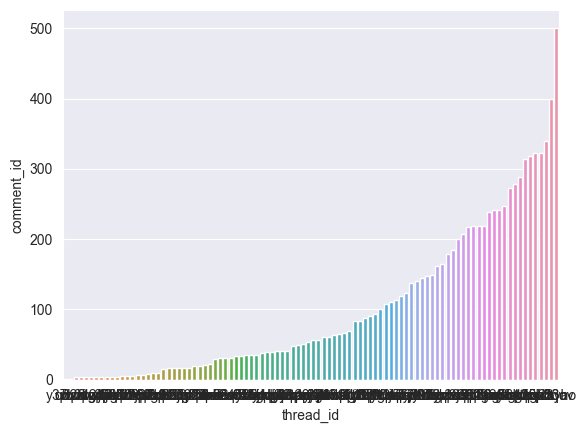

In [33]:
counts_per_thread = data.groupby(["thread_id"]).count().reset_index().sort_values(by = "comment_id")
sns.barplot(x = counts_per_thread["thread_id"], y = counts_per_thread["comment_id"])
# uneven number of comments per thread from 1 to about 500
# this could be partially due to some threads just having fewer comments in general
# and partially from errors during scraping
# overall this is not a major issue as it gives us some insight into discussion about different episodes
# however it is important to shuffle data before splitting into train and test sets

In [34]:
print(np.mean(counts_per_thread["comment_id"]))

100.25


In [39]:
comment_lengths = [len(x) for x in data["comment_text"]]
print("Mean length: ", np.mean(comment_lengths))
print("Min length: ", np.min(comment_lengths))
print("Max length: ", np.max(comment_lengths))

Mean length:  119.32024106400665
Min length:  2
Max length:  3419


In [ ]:
# comment length generally varies with some users writing entire paragraphs
# and some users just writing "OK" or using and emoji
# this is also before preprocessing so all special characters and stopwords are still included

TODO:
- filter out comments by comment_text isna == False
- try to decode thread ids (which episodes have more comments)
- tag data
- continue processing and train models